<a id='top'></a>

# Racial Discrimination in the US Job Market

---
### Background

Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

---
### The Data
* In the dataset provided, each row represents a résumé. The `'race'` column has two values, `'b'` and `'w'`, indicating black-sounding and white-sounding. The column `'call'` has two values, `1` and `0`, indicating whether the résumé received a call from employers or not.


* Available Here: https://www.aeaweb.org/articles?id=10.1257/0002828042002561


* More Information: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states, including this:

    * Nearly 5,000 résumés were sent in response to over 1,300 newspaper ads for sales, administrative, and clerical jobs in Boston and Chicago. Résumés were randomly assigned either a black-sounding name (such as Lakisha Washington or Jamal Jones) or white-sounding name (such as Emily Walsh or Brendan Baker) to imply the applicant's race. Names were chosen according to frequency data obtained from birth certificates of Massachusetts births from 1974 and 1979. The validity of the names' "blackness" or "whiteness" was confirmed by surveys in public areas in Chicago.

    * Résumés also varied by quality, with higher quality résumés having features such as summer employment experience, school-year employment, volunteering experience, extra computer skills, special honors, or military experience. Two high- and two low-quality résumés were sent to each job opening. The responses of prospective employers were measured according to a given résumé's ability to elicit a call back or e-mail request for an interview.

---
### Perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for résumés.

ANSWER THE FOLLOWING QUESTIONS:

[What test is appropriate for this problem? Does CLT apply?](#one)

[What are the null and alternative hypotheses?](#two)

[Compute margin of error, confidence interval, and p-value.](#three)

[Write a story describing the statistical significance in the context of the original problem.](#four)

[Does the analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how should the analysis be amended?](#five)

## Import and Inspect

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Show all plots:
%matplotlib inline

In [2]:
# Read and save dataset as a dataframe:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# Inspect the state of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [3]:
# Set options to inspect ALL of the columns:
pd.options.display.max_columns = 65

# Inspect the structure of the dataframe:
df.head(10)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,4,0,0,0,1,Jay,m,w,0.0,1.0,0.0,c,s,386.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,1.0,,,1.0,40.0,135.0,40.0,135.0,0.0,0.008141,0.973413,11.137956,0.047958,0.413306,10.393723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,1,1,1,1,1,Jill,f,w,1.0,0.0,0.0,c,s,386.0,0.002796,0.952140,10.453601,0.236445,0.124980,9.621058,1.0,,,1.0,40.0,135.0,40.0,135.0,0.0,0.008141,0.973413,11.137956,0.047958,0.413306,10.393723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
7,b,1,3,4,21,0,1,0,1,313,5,0,1,1,1,Kenya,f,b,1.0,0.0,0.0,c,a,385.0,0.116624,0.728339,10.287047,0.139843,0.365636,9.933725,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
8,b,1,4,3,3,0,0,0,0,316,6,0,0,1,1,Latonya,f,b,0.0,1.0,0.0,c,s,386.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,1.0,,,1.0,40.0,135.0,40.0,135.0,0.0,0.008141,0.973413,11.137956,0.047958,0.413306,10.393723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
9,b,1,4,2,6,0,1,0,0,263,4,1,1,0,1,Tyrone,m,b,1.0,0.0,0.0,c,s,386.0,0.992043,0.004814,8.841738,0.295093,0.053182,8.507345,1.0,,,1.0,40.0,135.0,40.0,135.0,0.0,0.008141,0.973413,11.137956,0.047958,0.413306,10.393723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [4]:
# Get a NULL count for the call column:
print("NULL observations for 'call' column:", df.call.isnull().sum())

# Get a NULL count for the race column:
print("NULL observations for 'race' column:", df.race.isnull().sum())

NULL observations for 'call' column: 0
NULL observations for 'race' column: 0


In [5]:
# Check for duplicate observations:
print('Number of duplicate records:', df.duplicated().sum())

Number of duplicate records: 0


The dataframe looks to be in good shape for this analysis!

In [6]:
# Out of curiosity  about this: Names were chosen according to frequency data obtained from birth certificates of Massachusetts births from 1974 and 1979. The validity of the names' "blackness" or "whiteness" was confirmed by surveys in public areas in Chicago. - 

# Get and save the unique names assigned to résumés:
black_names = df.firstname[df.race == 'b'].value_counts()
white_names = df.firstname[df.race == 'w'].value_counts()

print('Black-Sounding Names Assigned to Résumés:')
print(black_names)
print('\n')
print('White-Sounding Names Assigned to Résumés:')
print(white_names)

Black-Sounding Names Assigned to Résumés:
Tamika      256
Latonya     230
Latoya      226
Ebony       208
Tanisha     207
Lakisha     200
Kenya       196
Keisha      183
Aisha       180
Tyrone       75
Tremayne     69
Rasheed      67
Kareem       64
Leroy        64
Jamal        61
Hakim        55
Jermaine     52
Darnell      42
Name: firstname, dtype: int64


White-Sounding Names Assigned to Résumés:
Anne        242
Allison     232
Emily       227
Kristen     213
Jill        203
Laurie      195
Sarah       193
Meredith    187
Carrie      168
Neil         76
Todd         68
Matthew      67
Jay          67
Brendan      65
Brad         63
Geoffrey     59
Brett        59
Greg         51
Name: firstname, dtype: int64


<a href='#top' id='one'>back to intro</a>

## What test is appropriate for this problem? Does CLT apply?

Since the rate of callbacks for the two groups is compared, a **two-proportion z-test** is appropriate.

Central Limit Theorem (CLT) states that regardless of the population, the distribution of sample averages tends to be normal. This holds for sample sizes greater than or equal to 30.

Some basic statistics and graphical data analysis will help with the CLT question and the next exercises:

In [7]:
# For a quick view - 

# Create a frequency table for callback status by race:
callback_table = pd.crosstab(index=df.call, columns=df.race, margins=True)

# Label the index column:
callback_table.index=['No','Yes', 'Total']

# Label the header row:
callback_table.columns = ['B', 'W', 'Total']

# Display the results:
print('Callbacks for Black and White Sounding Names:')
callback_table

Callbacks for Black and White Sounding Names:


,B,W,Total
No,2278,2200,4478
Yes,157,235,392
Total,2435,2435,4870


This looks like enough to confirm CLT, but some of these statistics are needed anyhow. Setup for such is next with a few checks of the computations:

In [8]:
# Save callbacks filtered by race:
black_callbacks = df.call[df.race == 'b']
white_callbacks = df.call[df.race == 'w']

In [9]:
# Set up variables for statistics related to Black-Sounding names - 

# Sample Size:
n_black = len(df[df.race == 'b'])

# Number of callbacks for black-sounding names:
n_black_calls = black_callbacks.sum()

print('Number of Black-Sounding Résumés:', n_black)
print('Callbacks for Black-Sounding Names:', n_black_calls)


print('\n') # Add a line space.


# Set up variables for statistics related to Whtie-Sounding names - 

# Sample Size:
n_white = len(df[df.race == 'w'])

# Number of callbacks for white-sounding names:
n_white_calls = white_callbacks.sum()

print('Number of White-Sounding Résumés:', n_white)
print('Callbacks for White-Sounding Names:', n_white_calls)

Number of Black-Sounding Résumés: 2435
Callbacks for Black-Sounding Names: 157.0


Number of White-Sounding Résumés: 2435
Callbacks for White-Sounding Names: 235.0


**The sample sizes are large enough for CLT to apply.** For a good broad view of the data to be analyzed:

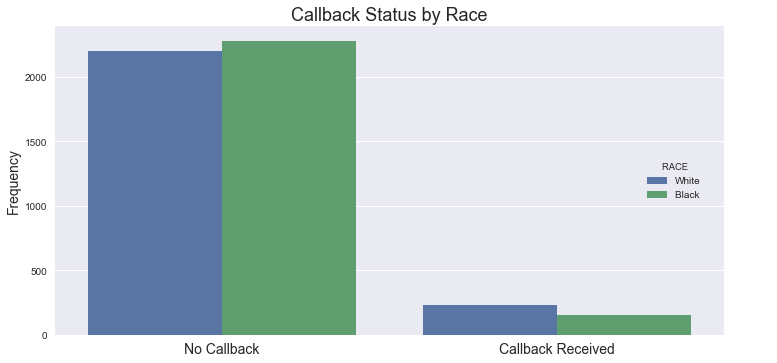

In [10]:
# Create a frequency graph of callback status by race:
fig = sns.factorplot(x='call',hue='race', data=df, kind='count', size=5, aspect=2)

# Customize the legend:
fig._legend.set_title('RACE                         ')
for text, label in zip(
    fig._legend.texts, 
    ['White', 'Black                         '] # Surely there's a better way to align the legend!
): text.set_text(label)

# Label tick marks, axes and add a title:
fig.set_xticklabels(['No Callback','Callback Received'], fontsize=14)
fig = plt.xlabel('')
fig = plt.ylabel('Frequency', fontsize=14)
fig = plt.title('Callback Status by Race', fontsize=18)

# Save the plot:
plt.savefig('reports/figures/callback_by_race.png', bbox_inches='tight')

<a href='#top' id='two'>back to intro</a>

## What are the null and alternative hypotheses?

From the graph above it is obvious that white-sounding names received more callbacks than black-sounding names, but is the difference significant? Also, in the context of provided background information, the alternative hypothesis assumes that racial discrimination is pervasive enough to be a factor in the job market.

**Null Hypothesis**: There is no difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:


$$H_0: \hat p_{white\_callbacks} - \hat p_{black\_callbacks} = 0$$


**Alternative Hypothesis**: There is a significant difference in the  proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:


$$H_a: {\hat p_{white\_callbacks}} - {\hat p_{black\_callbacks}} \neq 0$$


**Significance Level**: 95% Confidence:

$$\alpha = 0.05$$

<a href='#top' id='three'>back to intro</a>

## Compute margin of error, confidence interval, and p-value.

In [11]:
def two_proportion_standard_error(hits1, attempts1, hits2, attempts2):
    """Return the standard error of two proportions."""
    
    # Calculate proportions:
    proportion1 = hits1/attempts1
    proportion2 = hits2/attempts2
    
    # Calculate standard error:
    SE = np.sqrt(proportion1*(1 - proportion1)/attempts1  +  proportion2*(1 - proportion2)/attempts2)
    return SE

def two_proportion_confidence_interval(hits1, attempts1, hits2, attempts2, alpha=0.05):
    """Return the confidence interval for a two-proportion test."""
    
    # Calculate proportions:
    proportion1 = hits1/attempts1
    proportion2 = hits2/attempts2
    difference_of_proportions = proportion1 - proportion2
    
    # Calculate standard error:
    SE = two_proportion_standard_error(hits1, attempts1, hits2, attempts2)
    
    # Save the critical value at the specified confidence:
    z_critical = norm.ppf(1 - 0.5*alpha)
    
    # Calculate margin of error:
    moe = z_critical * SE
    
    # Calculate confidence intervals:
    confidence_lower = proportion2 - proportion1 - moe
    confidence_higher = proportion2 - proportion1 + moe
    
    return difference_of_proportions, moe, confidence_lower, confidence_higher

In [12]:
# Compute and save confidence interval and margin of error:
difference_of_proportions, moe, confidence_lower, confidence_higher = two_proportion_confidence_interval(n_white_calls, n_white, n_black_calls, n_black)

print('Difference of Proportions: {0:0.4f}'.format(difference_of_proportions))
print('Margin of Error: {0:0.4f}'.format(moe))
print('95% Confidence Interval: [ {0:0.4f}  {1:0.4f} ]'.format(confidence_lower, confidence_higher))

Difference of Proportions: 0.0320
Margin of Error: 0.0153
95% Confidence Interval: [ -0.0473  -0.0168 ]


In [13]:
def two_proportion_z_test(hits1, attempts1, hits2, attempts2, one_tailed=False):
    """Return z-statistic and p-value."""
    
    # Calculate proportions:
    proportion1 = hits1/attempts1
    proportion2 = hits2/attempts2
    proportion = (hits1 + hits2)/(attempts1 + attempts2)
    
    # Calculate standard error:
    SE = np.sqrt(proportion * (1-proportion) * (1/attempts1 + 1/attempts2))
    
    # Calculate and return z-statistic and p-value:
    z = (proportion1 - proportion2)/SE
    p = 1 - stats.norm.cdf(abs(z))
    
    # If one_tailed = False(0), then p *= 2 is calculated:
    p *= 2 - one_tailed
    
    return z, p

In [14]:
# Compute and save z-statistic and p-value:
z, p = two_proportion_z_test(n_white_calls, n_white, n_black_calls, n_black)

print('z-statistic: {0:0.4f}'.format(z))
print('p-value: {0:0.4f}'.format(p))

z-statistic: 4.1084
p-value: 0.0000


The p-value is less than 0.05, and the confidence interval does not contain zero, so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that there is no difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names. The positive z-statistic indicates that white-sounding names result in a better call-back rate.

<a href='#top' id='four'>back to intro</a>

## Write a story describing the statistical significance in the context of original problem.

To study the effect of racial discrimination in the U.S. labor market, researchers randomly assignined identical résumés to black-sounding or white-sounding names and recorded the impact on requests for interviews from employers. This analysis tested the effect of race on callback success. Assuming controls were appropriate for other factors related to callbacks, the statistics test indicates that racial discrimination in the United States labor market is significant. Résumés with white-sounding names are more likely to receive a callback.

<a href='#top' id='five'>back to intro</a>

## Does the analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how should the analysis be amended?

This analysis does not mean that race is the most important factor in callback success. Other factors have not been tested. 

Gender could certainly be a factor.

The information states that resumés varied by quality, with higher quality résumés having features such as summer employment experience, school-year employment, volunteering experience, extra computer skills, special honors, or military experience. Since controls were set for quality, related variables shouldn't be a factor. That said, there are two columns, `'h'` and `'l'` with values of either `l` or `0`. Assuming this is the quality designation given by the researchers, it could be scrutinized.

Regardless of whether quality assignments are proper, a look at the correlation of all categorical variables could also be helpful. However, some of the variables are not clear, so more information is needed.

Assuming the `'eoe'` variable indicates Equal Opportunity Employment, comparisons could point to the effect of EOE on callbacks for different genders and races. One would hope it has the intended effect!

For now, a quick look at gender and callbacks:

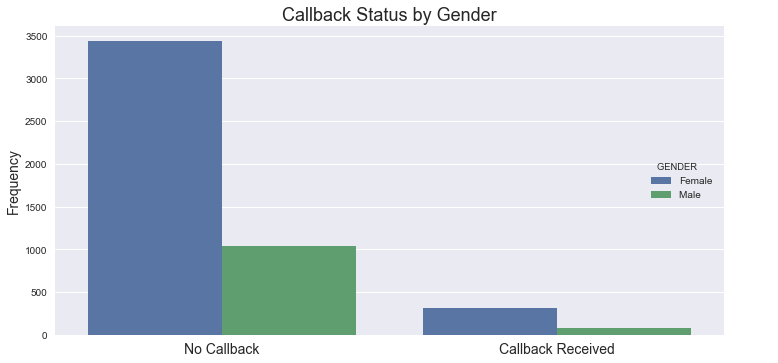

In [15]:
# Create a frequency graph of callback status by gender:
fig = sns.factorplot(x='call',hue='sex', data=df, kind='count', size=5, aspect=2)

# Customize the legend:
fig._legend.set_title('GENDER                         ')
for text, label in zip(
    fig._legend.texts, 
    ['Female', 'Male                         ']
): text.set_text(label)

# Label tick marks, axes and add a title:
fig.set_xticklabels(['No Callback','Callback Received'], fontsize=14)
fig = plt.xlabel('')
fig = plt.ylabel('Frequency', fontsize=14)
fig = plt.title('Callback Status by Gender', fontsize=18)

It's difficult to get a clear view of any significance, but it's easy to copy and paste previous work:

In [16]:
# Save callbacks filtered by gender:
female_callbacks = df.call[df.sex == 'f']
male_callbacks = df.call[df.sex == 'm']


# Set up variables for statistics related to Female names - 

# Sample Size:
n_female = len(df[df.sex == 'f'])

# Number of callbacks for female names:
n_female_calls = female_callbacks.sum()

print('Number of Female Résumés:', n_female)
print('Callbacks for Female Names:', n_female_calls)


print('\n') # Add a linespace.


# Set up variables for statistics related to Male names - 

# Sample Size:
n_male = len(df[df.sex == 'm'])

# Number of callbacks for male names:
n_male_calls = male_callbacks.sum()

print('Number of Male Résumés:', n_male)
print('Callbacks for Male Names:', n_male_calls)


print('\n') # Add a linespace.


# Compute and print the difference of proportions:
a, b, c, d = two_proportion_confidence_interval(n_female_calls, n_female, n_male_calls, n_male)
print('Difference of Proportions: {0:0.4f}'.format(a))

Number of Female Résumés: 3746
Callbacks for Female Names: 309.0


Number of Male Résumés: 1124
Callbacks for Male Names: 83.0


Difference of Proportions: 0.0086


In [17]:
# Calculate and save z-statistic and p-value:
z, p = two_proportion_z_test(n_female_calls, n_female, n_male_calls, n_male)

print('p-value: {0:0.4f}'.format(p))

p-value: 0.3501


The idea that gender could be a factor is rejected. Though, this doesn't rule out race and gender combinations that might be significant.

<a href='#top'>back to intro</a>